# Aula 4

---

**Saulo Martiello Mastelini**<br>
Candidato a Ph.D. pelo ICMC-USP<br>
Online Machine Learning

Página pessoal: [smastelini](https://smastelini.github.io/)</br>
e-mail: saulomastelini@gmail.com

---

## Sumário:

- Regressão linear
- Regressão logística
- Support Vector Machines
- Regularização
- Métricas de avaliação para regressão
- Visualização de fronteiras de decisão

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn import linear_model as lm

## 1. Modelos lineares (regressão)

In [2]:
x, y = make_regression(
    n_samples=200,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=42
)

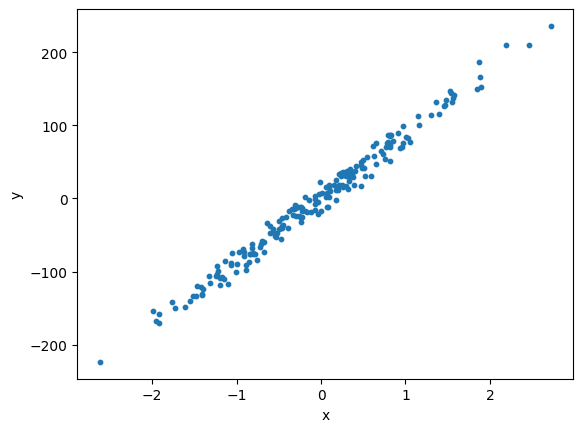

In [3]:
plt.scatter(x=x[:, 0], y=y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 1.1. Voltando para álgebra linear

- Equação da reta, em sua forma mais básica:
$$y = w_1 x + w_0$$
- $Ax = b$
    - $n$ linhas e $m$ colunas
- Solução (num mundo ideal)
    - $x = A^{-1}b$
- $A$ deve ser quadrada
    - $m = n$
- $A$ deve ser inversível
- Não pode haver haver correlação entre as colunas em A
- E assim por diante...
- Se esses requerimentos não acontecem, não é possível encontrar uma solução exata
- Regressão simples x múltipla
    - Estamos falando de tarefas de regressão aqui

- ML cria também modelos lineares
    - Em geral, regressão múltipla

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$$

- O termo `w_0` é chamado bias, ou também, intercepto (_intercept_).
    - O ponto onde a reta resultante cruza o eixo y (eixo das ordenadas)
        - x é o eixo das abcissas

- _Ordinary Least Squares_: versão básica da regressão
    - Minimiza $\min\limits_w\|Xw - y\|^2$

- A resolução do sistema linear resultante nos dará os valores de `w` (coeficientes lineares)
    - Na vida real, os requisitos necessários para inverter $X$ raramente são atendidos
    - Solução aproximada!

- Usando o jargão de ML:
    - $X = A$
    - $y = b$

In [4]:
lr = lm.LinearRegression()
lr.fit(x, y)

LinearRegression()

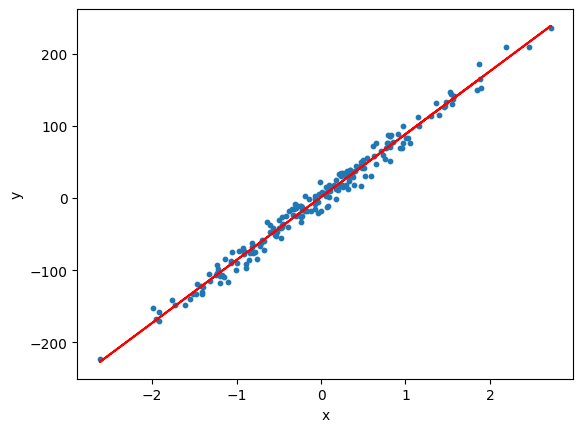

In [5]:
plt.scatter(x=x[:, 0], y=y, s=10)
plt.plot(x[:, 0], lr.predict(x), c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
lr.coef_, lr.intercept_

(array([87.36641987]), 1.4285139010211898)

- Estratégias usuais: _Singular Value Decomposition_ (SVD) e _Stochastic Gradient Descent_ (SGD)
- O SVD também é utilizado na Análise de Componentes Principais (PCA - _Principal Component Analysis_)
    - Que abordaremos na aula de hoje
- O SGD é um componente essencial das redes neurais e deep learning!
    - Iremos abordá-lo futuramente
- Tanto o SVD, quanto o SGD podem ser usado para resolverem sistemas lineares
    - Parece pouco?
    - Espero mudar sua opinião

### 1.2. Singular Value Decomposition

- SVD: $A = U \Sigma V^T$
    - Decompõe uma matriz com dimensões quaisquer no produto de três matrizes
    - $A$: $m\times n$
    - $U$: $m \times m$
    - $\Sigma$: $m \times n$
    - $V$: $n \times n$
- $U$ e $V$ são matrizes unitárias:
    - $UU^T = I$
    - $VV^T = I \rightarrow$ matriz identidade
        - Diagonal com $1$ e o restante $0$
- $\Sigma$ é uma matriz diagonal
    - Todos os valores (exceto na diagonal) são zero
- Aproximamos $A^{-1}$ utilizando $\text{SVD}^{-1}$
- Propriedade da SVD:
    - $(U\Sigma V^T)^{-1} = V\Sigma^{-1}U^T = A^+$
    
- Nós utilizamos $A^+$ como uma aproximação para $A^{-1}$

- Aplicando o SVD no nosso problema introdutório:



In [7]:
# Adicionamos uma coluna com 1's para representar o termo de bias:
#    1 x qualquer coisa = qualquer coisa
A = np.column_stack([x, np.ones(x.shape[0])])

In [8]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

In [9]:
U.shape, Vt.shape, np.diag(S).shape

((200, 2), (2, 2), (2, 2))

In [10]:
w = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y


In [11]:
w

array([87.36641987,  1.4285139 ])

- Agora sabemos de onde os coeficientes vêm.
- Propriedade interessante do SVD:
    - Podemos combinar os elementos de $U$ e $V^T$ escalados pela entrada correspondente em $\Sigma$
    - Reconstruir de forma aproximada a matriz original
    
<figure>
      
</figure>

<figure>
  <img src="https://sthalles.github.io/assets/svd-for-regression/rank-approximations.png" width="700px">
  <figcaption>Fonte: <a href="https://sthalles.github.io/svd-for-regression/">Understanding Linear Regression using the Singular Value Decomposition
</a>
  </figcaption>
</figure>

- Essa é a base da PCA

- Podemos utilizar os modelos lineares para resolver problemas mais realísticos.


## 2. Métricas de desempenho para regressão

- Mean Absolute Error (MAE)

$$MAE(y, \hat{y}) = \frac{1}{N}\sum_{i=0}^N |y_i - \hat{y}_i|$$

- Root Mean Square Error (RMSE)

$$RMSE(y, \hat{y}) = \frac{1}{N}\sqrt{\sum_{i=0}^N (y_i - \hat{y}_i)^2}$$

- Coeficiente de Determinação (R2)
    - Indica quão bom está o seu modelo
    - Intervalo $(-\infty, 1]$ (1 é o melhor valor possível)
    - Deve ser utilizado em conjunto com métricas de erro

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_validate, train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

- Medir o número de octanas em amostras de gasolina ([Fonte dos dados](https://github.com/gustavovelascoh/octane-NIR))
- X: frequências medidas com NIR (Espectroscopia de Infravermelho Próximo)
- y: número de octanas

In [13]:
df = pd.read_csv("data/a4/gasoline.csv")
df.head()

,octane,NIR.900 nm,NIR.902 nm,NIR.904 nm,NIR.906 nm,NIR.908 nm,NIR.910 nm,NIR.912 nm,NIR.914 nm,NIR.916 nm,...,NIR.1682 nm,NIR.1684 nm,NIR.1686 nm,NIR.1688 nm,NIR.1690 nm,NIR.1692 nm,NIR.1694 nm,NIR.1696 nm,NIR.1698 nm,NIR.1700 nm
1,85.30,-0.050193,-0.045903,-0.042187,-0.037177,-0.033348,-0.031207,-0.030036,-0.031298,-0.034217,...,1.198461,1.224243,1.242645,1.250789,1.246626,1.250985,1.264189,1.244678,1.245913,1.221135
2,85.25,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,...,1.128877,1.148342,1.189116,1.223242,1.253306,1.282889,1.215065,1.225211,1.227985,1.198851
3,88.45,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,...,1.147964,1.167798,1.198287,1.237383,1.260979,1.276677,1.218871,1.223132,1.230321,1.208742
4,83.40,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,...,1.160089,1.169350,1.201066,1.233299,1.262966,1.272709,1.211068,1.215044,1.232655,1.206696
5,87.90,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,...,1.252712,1.238013,1.259616,1.273713,1.296524,1.299507,1.226448,1.230718,1.232864,1.202926


In [14]:
df.shape

(60, 402)

Muito mais colunas do que linhas.

- Precisaremos lidar com isso!

In [15]:
X = df.drop("octane", axis=1)
y = df["octane"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=8)

In [17]:
reg_scorers = {
    "R2": make_scorer(r2_score),
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "MAE": make_scorer(mean_absolute_error),
}

In [18]:
res_lr = cross_validate(
    make_pipeline(StandardScaler(), lm.LinearRegression()),
    X_train, y_train,
    cv=KFold(n_splits=10, shuffle=True, random_state=42),
    scoring=reg_scorers
)

# Atenção: ignorar o sinal do erro RMSE (detalhe de implementação do sklearn)
res_lr = pd.DataFrame(res_lr)
res_lr.mean(axis=0)

fit_time      0.034607
score_time    0.006784
test_R2       0.955525
test_RMSE     0.256838
test_MAE      0.201224
dtype: float64

## 3. Regularização

- Alteração da função de otimização para fazer os pesos seguirem um certo comportamento.
- Forma de evitar _overfitting_ e garantir que os modelos lineares assumam um certo comportamento.

### 3.1. LASSO

- _Least Absolute Shrinkage and Selection Operator_
- Regularização `l1`.
- Adiciona a magnitude absoluta dos pesos à função de otimização.
    - Minimiza $\min\limits_w\|Xw - y\|^2 + \lambda \|w\|_1$
- Força alguns pesos a se tornarem iguais a zero.
    - Seleção de atributos :D

### 3.2. Ridge Regression

- Regularização `l2`
- Adiciona a magnitude quadrática dos pesos à função de otimização
    - Minimiza $\min\limits_w\|Xw - y\|^2 + \lambda \|w\|_2^2$

### 3.3. Elastic Net

- Combinação ponderada da regularização `l1` e `l2`

---

Na prática!

(No sklearn o $\lambda$ é chamado de `alpha`)


In [19]:
res_l1 = cross_validate(
    make_pipeline(StandardScaler(), lm.Lasso(alpha=0.01, max_iter=5000)),
    X_train, y_train,
    cv=KFold(n_splits=10, shuffle=True, random_state=42),
    scoring=reg_scorers
)

# Atenção: ignorar o sinal do erro RMSE (detalhe de implementação do sklearn)
res_l1 = pd.DataFrame(res_l1)
res_l1.mean(axis=0)

fit_time      0.055884
score_time    0.005248
test_R2       0.963618
test_RMSE     0.212487
test_MAE      0.172473
dtype: float64

In [20]:
res_l2 = cross_validate(
    make_pipeline(StandardScaler(), lm.Ridge()),
    X_train, y_train,
    cv=KFold(n_splits=10, shuffle=True, random_state=42),
    scoring=reg_scorers
)

# Atenção: ignorar o sinal do erro RMSE (detalhe de implementação do sklearn)
res_l2 = pd.DataFrame(res_l2)
res_l2.mean(axis=0)

fit_time      0.026306
score_time    0.007150
test_R2       0.970259
test_RMSE     0.191477
test_MAE      0.158753
dtype: float64

Hora da verdade!

In [21]:
def extract_coefs(pipeline, model_name):
    lr = pipeline.steps[-1][1]

    plt.figure(dpi=100)
    plt.bar(np.arange(len(lr.coef_)), lr.coef_)
    plt.title(f"{model_name} | Intercepto: {lr.intercept_:.4f}")
    plt.show()
    
    return None

In [22]:
lr = make_pipeline(StandardScaler(), lm.LinearRegression())
l1 = make_pipeline(StandardScaler(), lm.Lasso(alpha=0.01, max_iter=5000))
l2 = make_pipeline(StandardScaler(), lm.Ridge())

lr.fit(X_train, y_train)
l1.fit(X_train, y_train)
l2.fit(X_train, y_train)

pass

In [23]:
yp_lr = lr.predict(X_test)
yp_l1 = l1.predict(X_test)
yp_l2 = l2.predict(X_test)

In [24]:
mean_squared_error(y_test, yp_lr, squared=False), r2_score(y_test, yp_lr)

(0.3631582982390908, 0.9072555123333139)

In [25]:
mean_squared_error(y_test, yp_l1, squared=False), r2_score(y_test, yp_l1)

(0.28529422913918806, 0.9427623050547554)

In [26]:
mean_squared_error(y_test, yp_l2, squared=False), r2_score(y_test, yp_l2)

(0.38542588995803806, 0.8955332871143621)

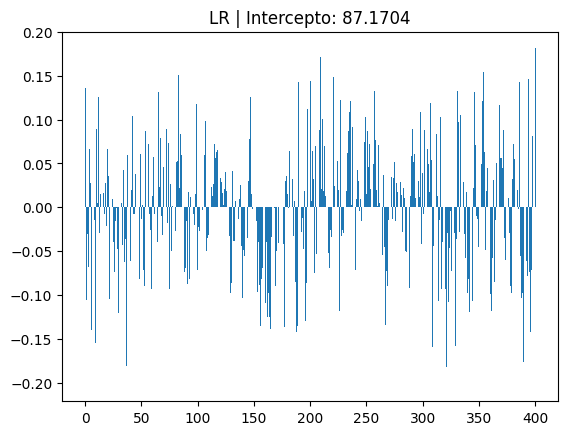

In [27]:
extract_coefs(lr, "LR")

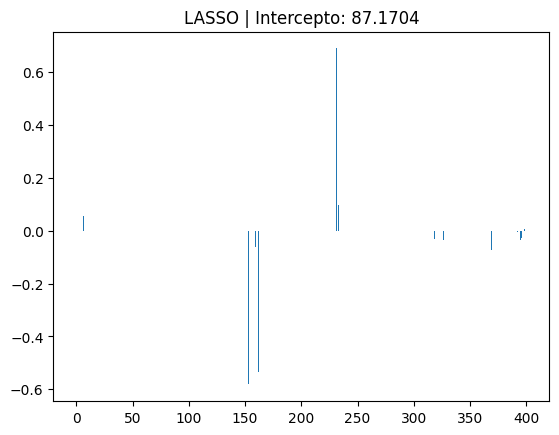

In [28]:
extract_coefs(l1, "LASSO")

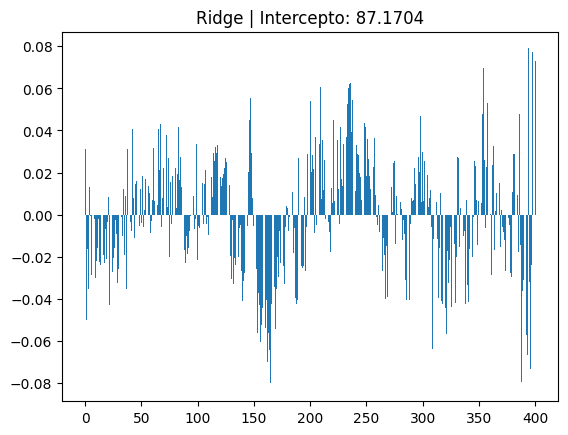

In [29]:
extract_coefs(l2, "Ridge")

In [30]:
np.where(l1.steps[1][1].coef_ != 0)[0]

array([  6, 153, 159, 162, 165, 231, 233, 318, 326, 369, 392, 395, 396,
       398])

In [31]:
selecionados = np.where(l1.steps[1][1].coef_ != 0)[0]

X.columns[selecionados]

Index(['NIR.912 nm', 'NIR.1206 nm', 'NIR.1218 nm', 'NIR.1224 nm',
       'NIR.1230 nm', 'NIR.1362 nm', 'NIR.1366 nm', 'NIR.1536 nm',
       'NIR.1552 nm', 'NIR.1638 nm', 'NIR.1684 nm', 'NIR.1690 nm',
       'NIR.1692 nm', 'NIR.1696 nm'],
      dtype='object')

**Bonus:** utilizando a PCA para reduzir a dimensionalidade

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train.shape[0], random_state=7)
pca.fit(X_train)

PCA(n_components=54, random_state=7)

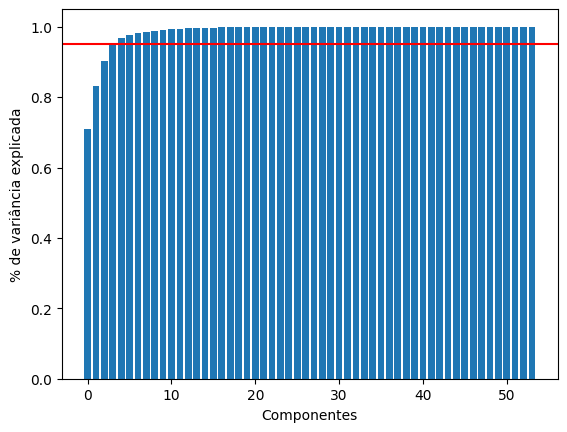

In [33]:
plt.figure(dpi=100)
plt.bar(np.arange(54), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Componentes")
plt.ylabel("% de variância explicada")
plt.axhline(0.95, color="red")
plt.show()

In [34]:
lr_pca = make_pipeline(
    StandardScaler(), 
    PCA(n_components=5, random_state=42),
    lm.LinearRegression()
)
lr_pca.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42)),
                ('linearregression', LinearRegression())])

In [35]:
yp_pca = lr_pca.predict(X_test)

In [36]:
mean_squared_error(y_test, yp_pca, squared=False), r2_score(y_test, yp_pca)

(0.23219240959850984, 0.9620866466239033)

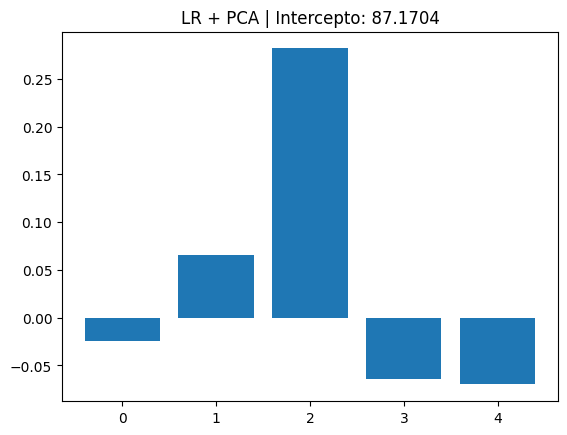

In [37]:
extract_coefs(lr_pca, "LR + PCA")

In [38]:
def repr_model(pipeline, x_names=None):
    lr = pipeline.steps[-1][1]

    if not x_names:
        x_names = [f"x{i + 1}" for i in range(len(lr.coef_))]

    r = []
    first = True

    for i, c in enumerate(lr.coef_):
        if np.abs(c) < 0.00001 :
            continue

        if first:
            r.append(f"{c:.4f} x {x_names[i]} ")
            first = False
            continue
    
        if c > 0:
            r.append(f"+ {c:.4f} x {x_names[i]} ")
        elif c < 0:
            r.append(f"- {np.abs(c):.4f} x {x_names[i]} ")
        
    
    interc = f"+ {lr.intercept_:.4f}" if lr.intercept_ > 0 else f"- {lr.intercept_:.4f}"

    return "y = " + "".join(r) + interc

In [39]:
print(repr_model(l1, list(X.columns)))

y = 0.0543 x NIR.912 nm - 0.5816 x NIR.1206 nm - 0.0614 x NIR.1218 nm - 0.5345 x NIR.1224 nm - 0.2551 x NIR.1230 nm + 0.6886 x NIR.1362 nm + 0.0960 x NIR.1366 nm - 0.0323 x NIR.1536 nm - 0.0344 x NIR.1552 nm - 0.0750 x NIR.1638 nm - 0.0062 x NIR.1684 nm - 0.0355 x NIR.1690 nm - 0.0278 x NIR.1692 nm + 0.0071 x NIR.1696 nm + 87.1704


In [40]:
print(repr_model(lr_pca))

y = -0.0244 x x1 + 0.0660 x x2 + 0.2821 x x3 - 0.0646 x x4 - 0.0700 x x5 + 87.1704


## 4. Regressão logística

- Apesar do nome, é um algoritmo de classificação
- Tipicamente classificação binária
    - Multiclasse: one vs. rest
        - Criar vários modelos binários
- Usa a função _logit_ ou função sigmoide
    - Varia entre 0 e 1
    
$$sigmoid(\tilde{x}) = \dfrac{1}{1 + e^{-\tilde{x}}}$$

<img src="img/a4/logistic-reg.webp" width="400">
    <figcaption>Exemplo 1: regressão logística. Fonte: James Thorn, via <a href="https://towardsdatascience.com/logistic-regression-explained-9ee73cede081">Towards Data Science</a></figcaption>
</img>

- $\tilde{x}$ é a combinação linear dos atributos do problema
- Estratégias de otimização normalmente utilizadas:
    - Gradiente descendente
    - _Maximum likelihood_ (máxima verossimilhança)
        - Estratégia para encontrar os parâmetros de um modelo probabilístico
    
<img src="img/a4/logistic-fitted.webp" width="400">
    <figcaption>Exemplo 2: logistic regression. Fonte: James Thorn, via <a href="https://towardsdatascience.com/logistic-regression-explained-9ee73cede081">Towards Data Science</a></figcaption>
</img>

In [41]:
from sklearn.datasets import make_circles
from sklearn.model_selection import StratifiedKFold

X_c, y_c = make_circles(n_samples=500, random_state=7, factor=0.7, noise=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


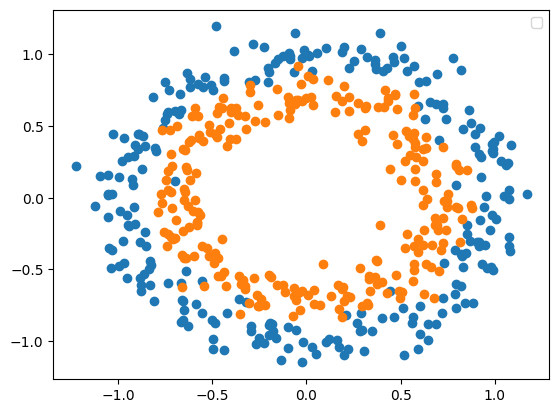

In [42]:
for c in np.unique(y_c):
    mask = y_c == c
    plt.scatter(X_c[mask, 0], X_c[mask, 1])

plt.legend()
plt.show()

In [43]:
log_reg = lm.LogisticRegression(random_state=0)


res_logr = cross_validate(
    log_reg,
    X_c, y_c,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=7),
    scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"]
)

res_logr = pd.DataFrame(res_logr)
res_logr.mean(axis=0)

fit_time                0.001872
score_time              0.002293
test_accuracy           0.454000
test_precision_macro    0.453895
test_recall_macro       0.454000
test_f1_macro           0.452584
dtype: float64

In [44]:
# Adaptado de: https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py
def plot_decision_boundaries(X, y, model):
    from matplotlib import colormaps
    import matplotlib.markers as mmarkers
    def mscatter(x, y, ax=None, m=None, **kw):
        if not ax: ax=plt.gca()
        sc = ax.scatter(x,y,**kw)
        if (m is not None) and (len(m)==len(x)):
            paths = []
            for marker in m:
                if isinstance(marker, mmarkers.MarkerStyle):
                    marker_obj = marker
                else:
                    marker_obj = mmarkers.MarkerStyle(marker)
                path = marker_obj.get_path().transformed(
                            marker_obj.get_transform())
                paths.append(path)
            sc.set_paths(paths)
        return sc

    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")

    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Right now it only works with binary tasks: expand both dictionaries or use cmap for multiclass tasks

    cmap = colormaps['brg']

    markers = {0: "o", 1: "^", 2: "s", 3: "D", 4: "+", 5: "*"}

    m = list(map(lambda i: markers[i], y))
    
    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    mscatter(x=X[:, 0], y=X[:, 1], c=y, m=m, cmap=cmap, alpha=1)
    
    plt.xlabel("x1",fontsize=15)
    plt.ylabel("x2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    return plt

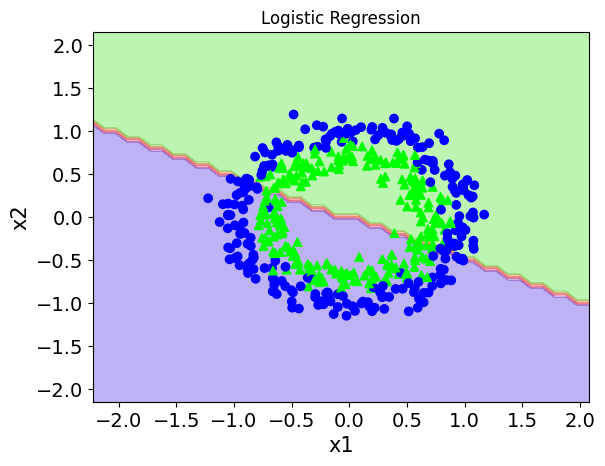

In [45]:
plot_decision_boundaries(X_c, y_c, lm.LogisticRegression(random_state=7))
plt.title("Logistic Regression")
plt.show()

## 5. Support Vector Machine (SVM)

- Modelo linear, por definição
- Modela relações não-lineares através da aplicação de funções kernel
    - Transformam os dados em dimensões para proporcionar a resolução


# TODO: continuar aqui!

In [46]:
from sklearn.svm import SVC

In [47]:
svm_l = SVC(kernel="linear")


res_svml = cross_validate(
    svm_l,
    X_c, y_c,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=7),
    scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"]
)

res_svml = pd.DataFrame(res_svml)
res_svml.mean(axis=0)

fit_time                0.004363
score_time              0.002643
test_accuracy           0.456000
test_precision_macro    0.455503
test_recall_macro       0.456000
test_f1_macro           0.453046
dtype: float64

In [48]:
svm_p = SVC(kernel="poly")


res_svmp = cross_validate(
    svm_p,
    X_c, y_c,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=7),
    scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"]
)

res_svmp = pd.DataFrame(res_svmp)
res_svmp.mean(axis=0)

fit_time                0.004264
score_time              0.002229
test_accuracy           0.592000
test_precision_macro    0.659053
test_recall_macro       0.592000
test_f1_macro           0.539076
dtype: float64

In [49]:
svm_r = SVC(kernel="rbf")


res_svmr = cross_validate(
    svm_r,
    X_c, y_c,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=7),
    scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"]
)

res_svmr = pd.DataFrame(res_svmr)
res_svmr.mean(axis=0)

fit_time                0.002361
score_time              0.002175
test_accuracy           0.934000
test_precision_macro    0.935863
test_recall_macro       0.934000
test_f1_macro           0.933921
dtype: float64

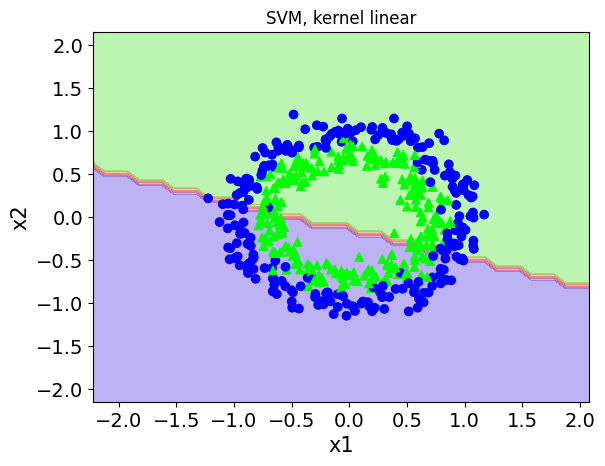

In [50]:
plot_decision_boundaries(X_c, y_c, SVC(kernel="linear"))
plt.title("SVM, kernel linear")
plt.show()

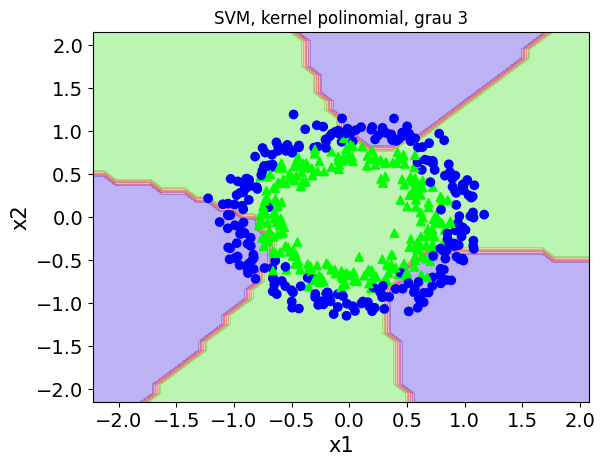

In [51]:
plot_decision_boundaries(X_c, y_c, SVC(kernel="poly"))
plt.title("SVM, kernel polinomial, grau 3")
plt.show()

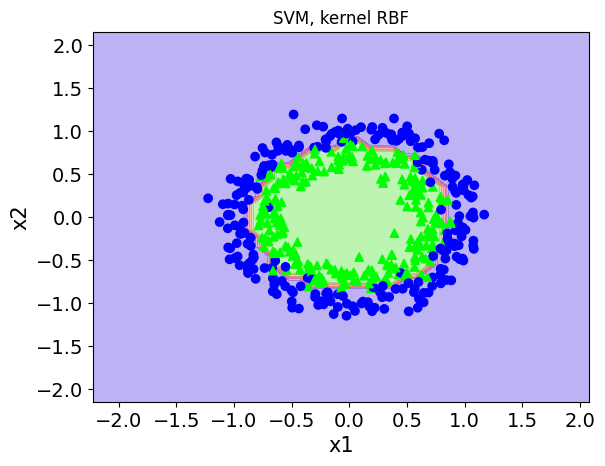

In [52]:
plot_decision_boundaries(X_c, y_c, SVC(kernel="rbf"))
plt.title("SVM, kernel RBF")
plt.show()

Bonus:

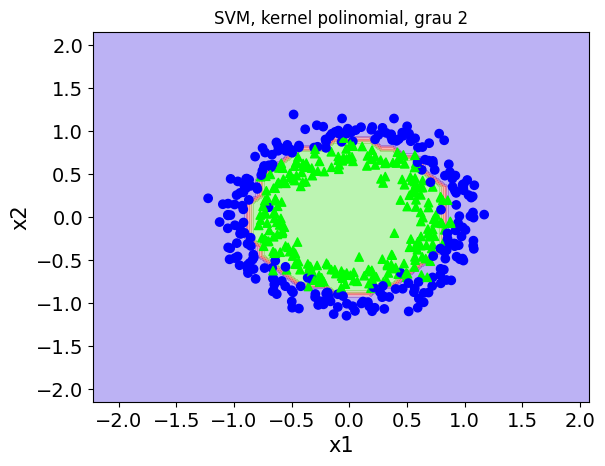

In [53]:
plot_decision_boundaries(X_c, y_c, SVC(kernel="poly", degree=2))
plt.title("SVM, kernel polinomial, grau 2")
plt.show()

# Tarefa

Vamos tomar um novo problema:

In [54]:
import random
from sklearn.datasets import make_moons

X_m, y_m = make_moons(n_samples=500, noise=0.1, random_state=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


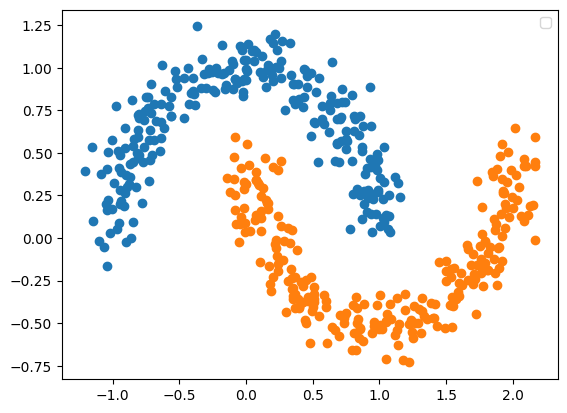

In [55]:
for c in np.unique(y_m):
    mask = y_m == c
    plt.scatter(X_m[mask, 0], X_m[mask, 1])

plt.legend()
plt.show()

Agora, vou criar uma semente de geração de números aleatórios secreta:

In [56]:
# secret_seed = ...

Essa seed é utilizada para embaralhar os seguintes modelos:

In [57]:
models = [lm.LogisticRegression(random_state=7), SVC(kernel="poly", degree=2), SVC(kernel="rbf")]

# rng = random.Random(secret_seed)
# rng.shuffle(models)

Os modelos embaralhados foram plotados utilizando os comandos:

```py

plot_decision_boundaries(X_m, y_m, models[0])
plt.show()

plot_decision_boundaries(X_m, y_m, models[1])
plt.show()

plot_decision_boundaries(X_m, y_m, models[2])
plt.show()
```

Eis os resultados, em ordem:

<figure>
  <img src="img/a4/m1.png" width="500px">
  <figcaption>Model[0]</figcaption>
</figure>

<figure>
  <img src="img/a4/m2.png" width="500px">
  <figcaption>Model[1]</figcaption>
</figure>

<figure>
  <img src="img/a4/m3.png" width="500px">
  <figcaption>Model[2]</figcaption>
</figure>

**Desafio:** você consegue identificar qual é qual? Argumente.


**R:**